In [1]:
from termcolor import cprint
cprint("project on : rain prediction".upper(),"red")
from datetime import datetime
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

PROJECT ON : RAIN PREDICTION


In [2]:
rain = pd.read_csv("weatherAUS.csv")

In [3]:
cprint(rain.head(),"blue")

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [4]:
cprint(rain.describe(),"green")

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

In [5]:
cprint(rain.info,"yellow")

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W

<Axes: >

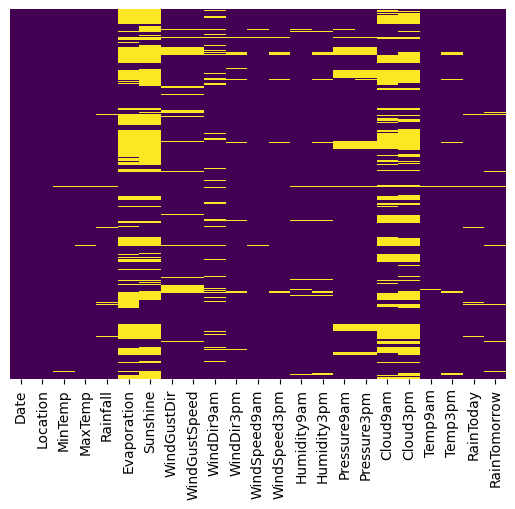

In [6]:
sns.heatmap(data=rain.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df = rain.drop(["Date","Evaporation","Sunshine","Cloud9am","Cloud3pm","Location"], axis =1)
cprint(df.head(),"red")

   MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0     13.4     22.9       0.6           W           44.0          W   
1      7.4     25.1       0.0         WNW           44.0        NNW   
2     12.9     25.7       0.0         WSW           46.0          W   
3      9.2     28.0       0.0          NE           24.0         SE   
4     17.5     32.3       1.0           W           41.0        ENE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0        WNW          20.0          24.0         71.0         22.0   
1        WSW           4.0          22.0         44.0         25.0   
2        WSW          19.0          26.0         38.0         30.0   
3          E          11.0           9.0         45.0         16.0   
4         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No           No  
1       10

In [8]:
df = df.dropna(axis = 0)
cprint(df.shape,"yellow")

(112925, 17)


In [9]:
cprint(df.columns,"red")

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


<Axes: >

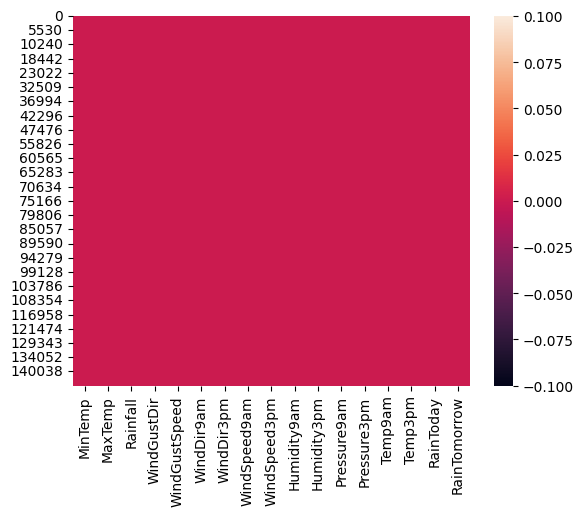

In [10]:
sns.heatmap(data=df.isnull())

<Axes: >

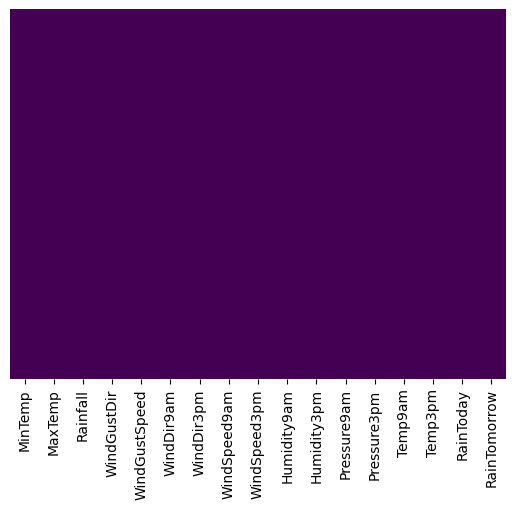

In [11]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

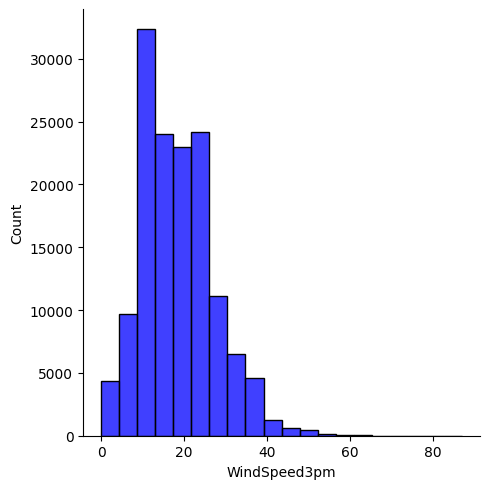

In [12]:
sns.displot(rain['WindSpeed3pm'].dropna(),kde=False,color='blue',bins=20)

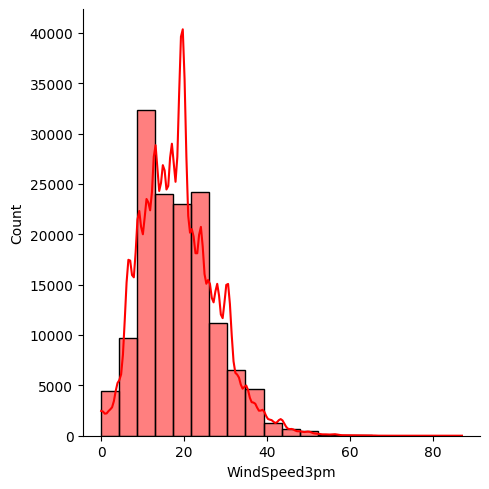

In [13]:
sns.displot(rain['WindSpeed3pm'].dropna(),kde=True,color='red',bins=20)

In [14]:
cprint(df.head(),"blue")

   MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0     13.4     22.9       0.6           W           44.0          W   
1      7.4     25.1       0.0         WNW           44.0        NNW   
2     12.9     25.7       0.0         WSW           46.0          W   
3      9.2     28.0       0.0          NE           24.0         SE   
4     17.5     32.3       1.0           W           41.0        ENE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0        WNW          20.0          24.0         71.0         22.0   
1        WSW           4.0          22.0         44.0         25.0   
2        WSW          19.0          26.0         38.0         30.0   
3          E          11.0           9.0         45.0         16.0   
4         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No           No  
1       10

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])


In [16]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [17]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

In [18]:
cprint(x.head(),"yellow")

   MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
0     13.4     22.9       0.6           13           44.0          13   
1      7.4     25.1       0.0           14           44.0           6   
2     12.9     25.7       0.0           15           46.0          13   
3      9.2     28.0       0.0            4           24.0           9   
4     17.5     32.3       1.0           13           41.0           1   

   WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          14          20.0          24.0         71.0         22.0   
1          15           4.0          22.0         44.0         25.0   
2          15          19.0          26.0         38.0         30.0   
3           0          11.0           9.0         45.0         16.0   
4           7           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  
0       1007.7       1007.1     16.9     21.8          0  
1       1010.6  

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33,random_state=42)

In [20]:
cprint(x_train,"green")

        MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
19475      16.3     20.6       0.0            8           96.0          10   
95110      22.9     28.7       0.2            9           50.0           9   
18977      11.4     17.5      69.2            9           74.0           9   
38239      11.9     17.6      12.6           13           72.0          13   
36609      17.0     31.0       0.0           15           33.0           0   
...         ...      ...       ...          ...            ...         ...   
97511      11.5     32.2       0.0            1           26.0           3   
141753     24.1     30.9      49.4           15           67.0          13   
133371      5.7     19.8       0.0            7           37.0           7   
1101       12.6     29.2       0.0           10           31.0           9   
21403      12.1     18.4       1.0           11           28.0           9   

        WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Hu

In [29]:
cprint(y_train,"green")

19475     1
95110     1
18977     1
38239     1
36609     0
         ..
97511     0
141753    1
133371    0
1101      0
21403     0
Name: RainTomorrow, Length: 75659, dtype: int32


In [22]:
cprint(y_test,"yellow")

139911    0
97321     0
33731     0
12735     0
1434      0
         ..
42918     0
71407     0
66462     0
84296     0
21281     0
Name: RainTomorrow, Length: 37266, dtype: int32


In [23]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [25]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     28874
           1       0.74      0.49      0.59      8392

    accuracy                           0.85     37266
   macro avg       0.80      0.72      0.75     37266
weighted avg       0.84      0.85      0.83     37266



In [26]:
print(accuracy_score(y_test, predictions))

0.8457843610798047


In [27]:
cm = confusion_matrix(y_test, predictions)
print(cm) 

[[27421  1453]
 [ 4294  4098]]


Text(0.5, 1.0, '0.8457843610798047')

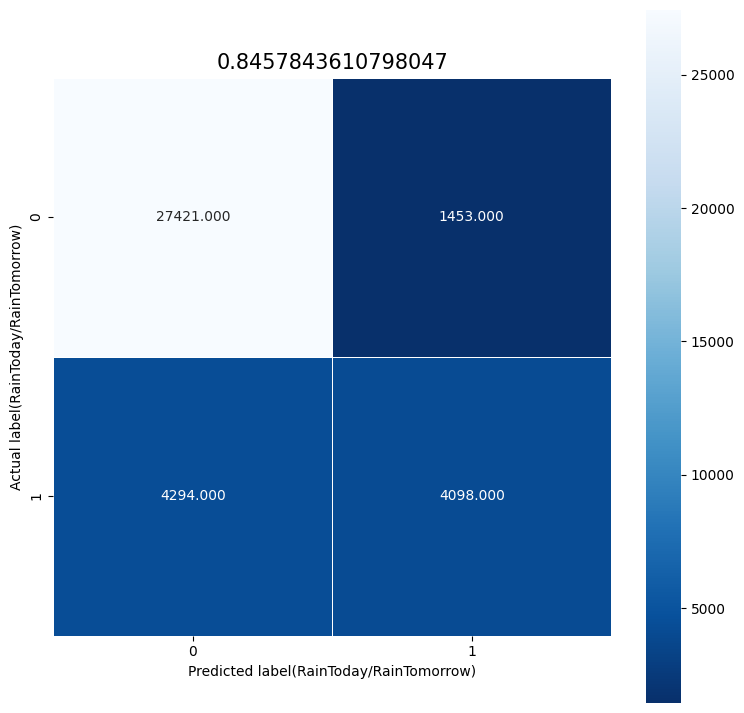

In [28]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label(RainToday/RainTomorrow)');
plt.xlabel('Predicted label(RainToday/RainTomorrow)');
all_sample_title = accuracy_score(y_test,predictions)
plt.title(all_sample_title, size = 15)